In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")
pd.set_option('display.max_columns', None)

In [2]:
%%time
df = pd.read_csv('/Volumes/transcend/大檔案/中華郵政/雙北市ACC價錢.csv')

<string>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 11s, sys: 20.6 s, total: 1min 31s
Wall time: 1min 52s


In [9]:
df[df['ACC01']==100039].head()

,ACC01,ACC02,ACC03,ACC04,ACC05,ACC06,ACC07,ACC10,ACC11,ACC12,ACC13,ACC14,ACC15,ACC16,ACC17,ACC18,ACC19,ACC20,ACC21,ACC22,ACC23,ACC24,ACC25,ACC26,ACC27,ACC28,ACC29,ACC30,ACC31,ACC32,ACC33,ACC34,ACC35,ACC36,ACC37,ACC38,ACC39,ACC40,局名,price


In [3]:
# df_post = pd.read_csv('/Volumes/transcend/大檔案/中華郵政/郵務局號.csv')
# df_post = df_post[['郵務局號','局名']]
# df_post = df_post.rename(columns={'郵務局號': 'ACC01'})
# df_post['局名'] = df_post['局名'].str.replace('郵局','')
# df = pd.merge(df, df_post, on='ACC01')

In [28]:
df.head(1)

,ACC01,ACC02,ACC03,ACC04,ACC05,ACC06,ACC07,ACC10,ACC11,ACC12,ACC13,ACC14,ACC15,ACC16,ACC17,ACC18,ACC19,ACC20,ACC21,ACC22,ACC23,ACC24,ACC25,ACC26,ACC27,ACC28,ACC29,ACC30,ACC31,ACC32,ACC33,ACC34,ACC35,ACC36,ACC37,ACC38,ACC39,ACC40,局名
0,100117,0,1,1,0.0,1070102,75412,100999,NaN,0,1,1,1,4.0,0,0,0,2,0,NaN,0,1,0,0,0,2.0,普通掛號公件信函,NaN,1.0,1,2000,1,90021210011701,90021210011701,NaN,NaN,10701,1,臺北大安


In [4]:
df['ACC29'].value_counts()

普通掛號信函             4243403
普通掛號小包              887589
不同縣市包裹              821913
國內普通掛號信函            612561
限時掛號信函              524414
同縣市包裹               490010
普通掛號公件信函            180593
國內普通信函              148536
普通掛號印刷物             130120
國內限時掛號信函            129523
國內普通掛號小包            125586
普通掛號信函附回執           112629
普通代收貨價小包            102667
商品快捷                101683
國內普通印刷物              78808
航空普通掛號小包             76897
國內同縣市包裹              73295
代收貨價不同縣市包裹           69372
不同縣市快捷               69168
同縣市快捷                69065
國內普通回執信函             67001
限時掛號小包               64396
航空包裹                 62228
國內不同縣市包裹             55921
航空普通掛號信函             50610
國內限時信函               48540
島嶼間互寄包裹              42142
文件快捷                 41535
限時掛號公件信函             32749
國內普通掛號信函附回執          31423
                    ...   
非法定紙幣報值島嶼間互寄快捷           2
歐非中南美航空普通回執小包            2
普通非法定紙幣報值小包附回執           2
歐非中南美航空快遞印刷物             2
航空包裹附回執                  2
限時掛號公件印刷物                2
報

In [33]:
# 共有318家郵局
len(df['ACC01'].value_counts())

318

In [5]:
# ACC14 & ACC15並無空值
df.isnull().sum()

ACC01           0
ACC02           0
ACC03           0
ACC04           0
ACC05          37
ACC06           0
ACC07           0
ACC10           0
ACC11    10101295
ACC12           0
ACC13           0
ACC14           0
ACC15           0
ACC16       27393
ACC17           0
ACC18           0
ACC19           0
ACC20           0
ACC21           0
ACC22    10075110
ACC23           0
ACC24           0
ACC25           0
ACC26           0
ACC27           0
ACC28      768446
ACC29           0
ACC30     2957748
ACC31           0
ACC32           0
ACC33           0
ACC34           0
ACC35      393618
ACC36      393618
ACC37     7743820
ACC38     9023302
ACC39           0
ACC40           0
dtype: int64

## ACC14 基本郵件種類

In [5]:
df['ACC14'].value_counts()

1    8059771
2    1709760
3     335364
Name: ACC14, dtype: int64

In [29]:
df_acc14 = df.groupby(['局名','ACC14']).size().reset_index()
df_acc14 = df_acc14.rename(columns={0: 'count'})
df_temp = df_acc14.groupby(['局名','ACC14']).agg({'count': 'sum'})
df_acc14_pcts = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_acc14_pcts = df_acc14_pcts.rename(columns={'count': 'percentage'})

### 找出寄件最多的郵局

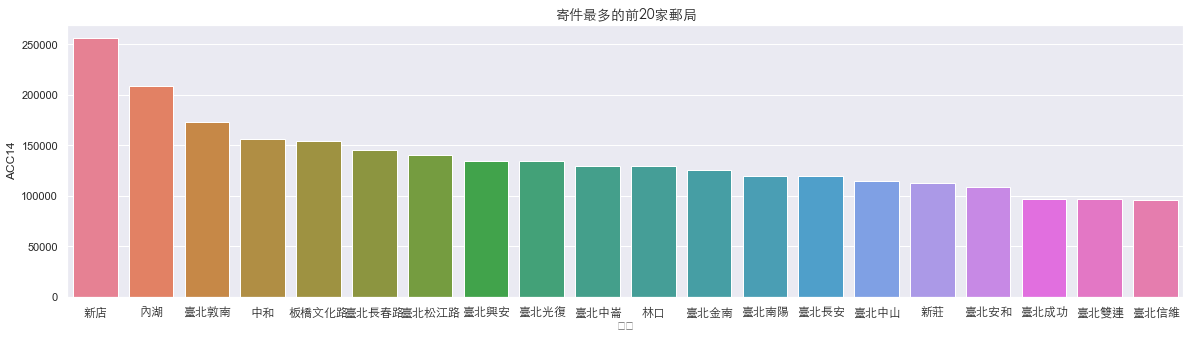

In [54]:
# maybe可以分配人力
df_temp = df.groupby('局名')['ACC14'].sum().reset_index()
sns.barplot(x='局名', y='ACC14', data=df_temp, order=df_temp.sort_values('ACC14', ascending=False)[0:20]['局名'], palette='husl')
plt.title('寄件最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 1. 函件

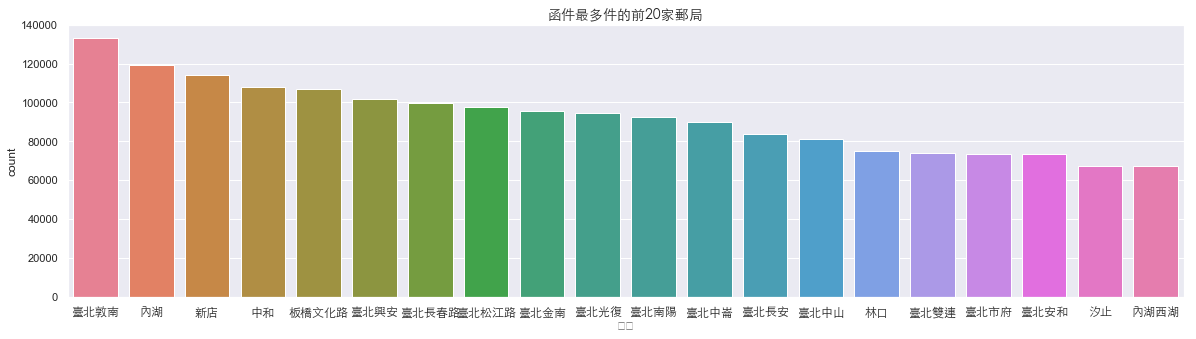

In [42]:
df_temp = df_acc14[df_acc14['ACC14']==1]
sns.barplot(x='局名', y='count', data=df_temp, order=df_temp.sort_values('count', ascending=False)[0:20]['局名'], palette='husl')
plt.title('函件最多件的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

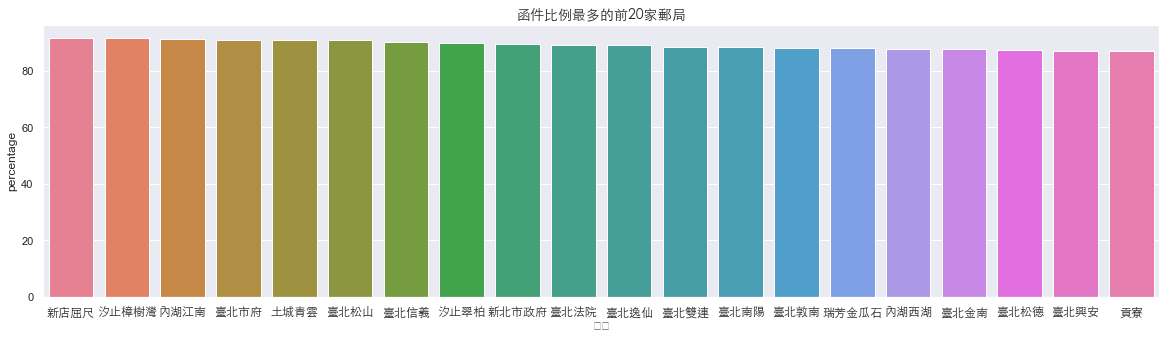

In [43]:
df_temp = df_acc14_pcts[df_acc14_pcts['ACC14']==1]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('函件比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 2. 包裹

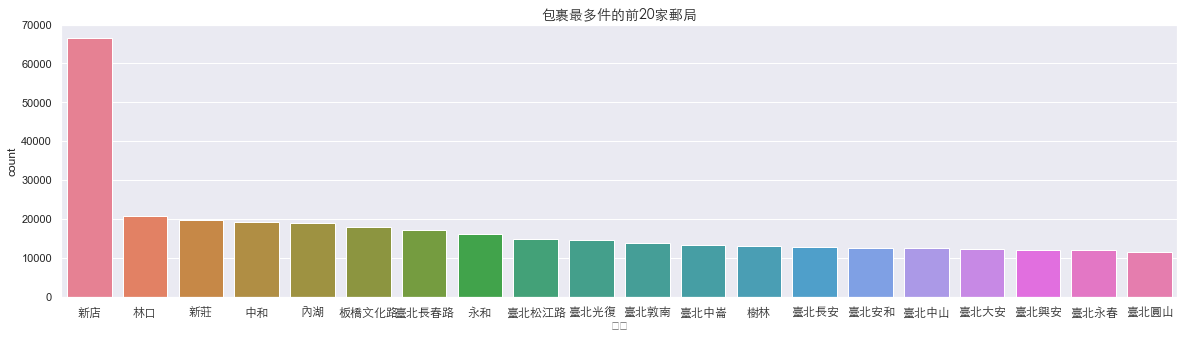

In [41]:
df_temp = df_acc14[df_acc14['ACC14']==2]
sns.barplot(x='局名', y='count', data=df_temp, order=df_temp.sort_values('count', ascending=False)[0:20]['局名'], palette='husl')
plt.title('包裹最多件的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

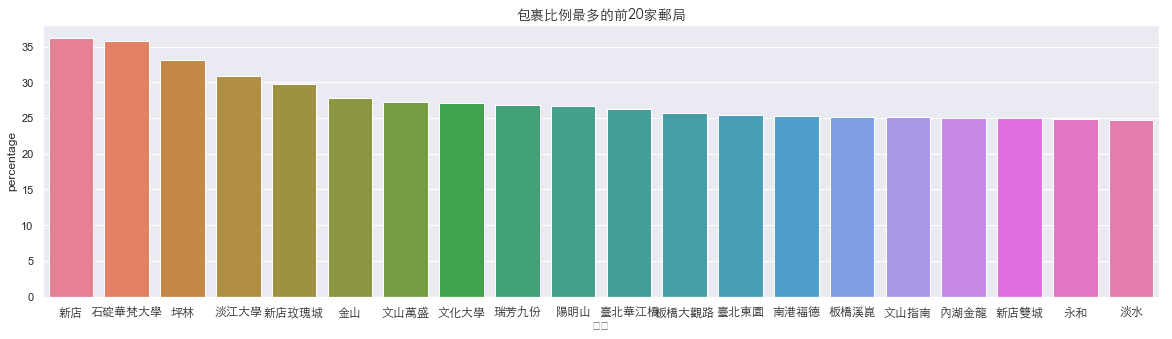

In [40]:
df_temp = df_acc14_pcts[df_acc14_pcts['ACC14']==2]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('包裹比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 3. 快捷

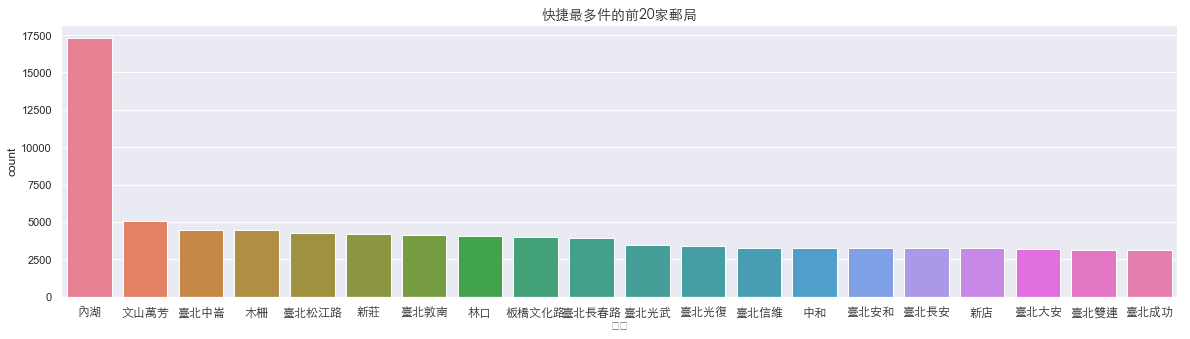

In [44]:
df_temp = df_acc14[df_acc14['ACC14']==3]
sns.barplot(x='局名', y='count', data=df_temp, order=df_temp.sort_values('count', ascending=False)[0:20]['局名'], palette='husl')
plt.title('快捷最多件的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

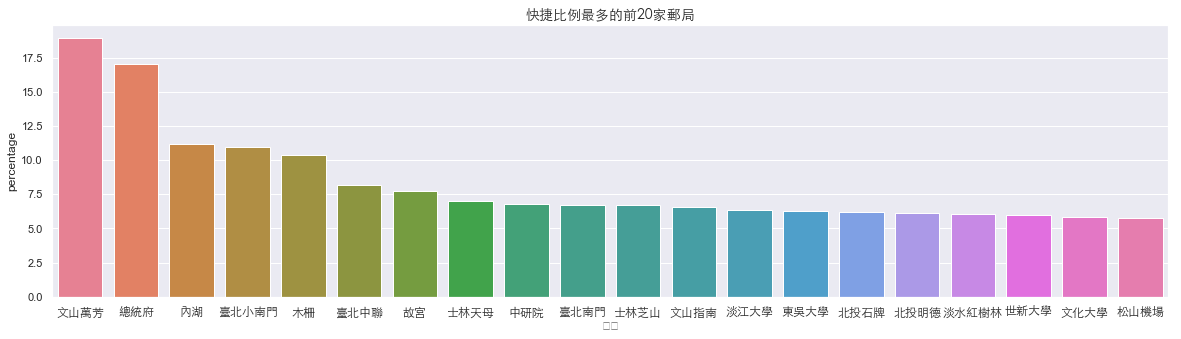

In [45]:
df_temp = df_acc14_pcts[df_acc14_pcts['ACC14']==3]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('快捷比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

## ACC15 細分類

In [77]:
# 去除V資料
df = df[df['ACC15'] != 'V']
df['ACC15'] = df['ACC15'].astype('int64')

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [81]:
df_acc15 = df.groupby(['局名','ACC14','ACC15']).size().reset_index()
df_acc15 = df_acc15.rename(columns={0: 'count'})

### 細分類各商品出現的次數

In [93]:
# 2和3都有沒有出現的品項
df_acc15.groupby(['ACC14','ACC15'])['count'].sum().reset_index()

,ACC14,ACC15,count
0,1,1,6362750
1,1,2,1346159
2,1,3,19905
3,1,4,4004
4,1,5,287683
5,1,6,4611
6,1,7,33546
7,1,8,141
8,1,9,8
9,2,1,1709739


### 1. 函件

In [98]:
df_temp = df_acc15[df_acc15['ACC14']==1].groupby(['局名','ACC15']).agg({'count': 'sum'})
df_acc15_pcts1 = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_acc15_pcts1 = df_acc15_pcts1.rename(columns={'count': 'percentage'})

### 小包比例

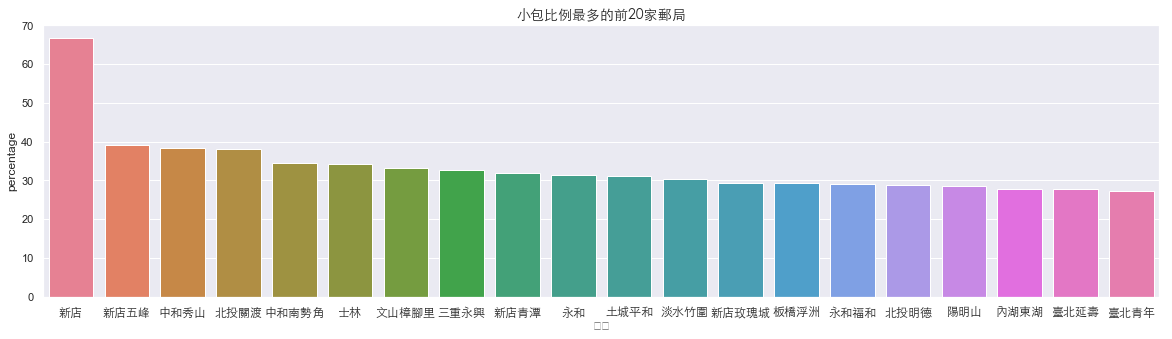

In [100]:
df_temp = df_acc15_pcts1[df_acc15_pcts1['ACC15']==2]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('小包比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 印刷物比例

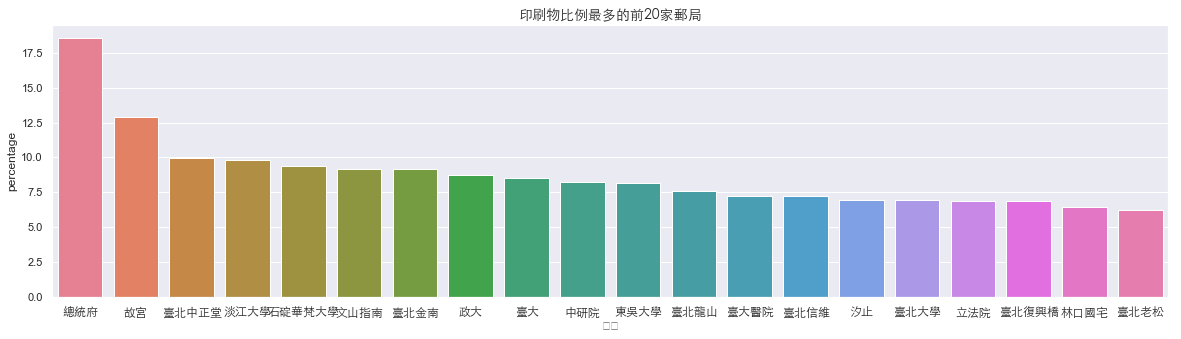

In [105]:
df_temp = df_acc15_pcts1[df_acc15_pcts1['ACC15']==5]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('印刷物比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 3. 快捷

In [120]:
df_temp = df_acc15[df_acc15['ACC14']==3].groupby(['局名','ACC15']).agg({'count': 'sum'})
df_acc15_pcts3 = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_acc15_pcts3 = df_acc15_pcts3.rename(columns={'count': 'percentage'})

### 一般快捷比例

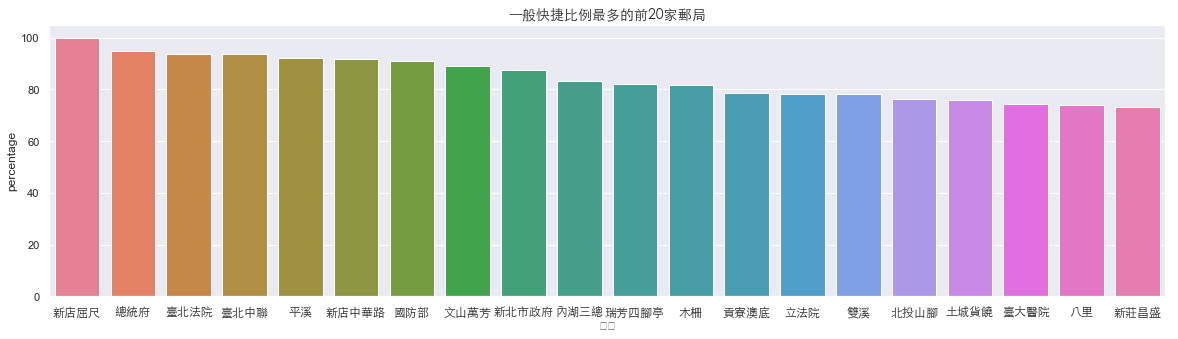

In [108]:
df_temp = df_acc15_pcts3[df_acc15_pcts3['ACC15']==1]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('一般快捷比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 文件快捷比例

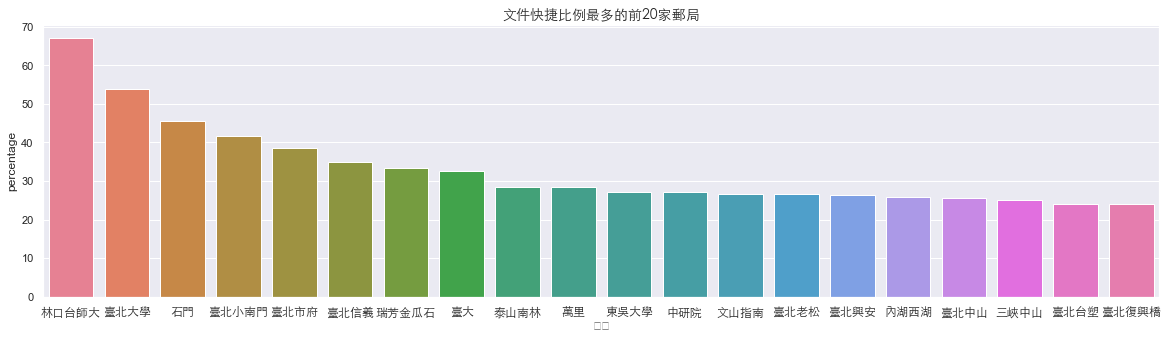

In [113]:
df_temp = df_acc15_pcts3[df_acc15_pcts3['ACC15']==2]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('文件快捷比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 商品快捷比例

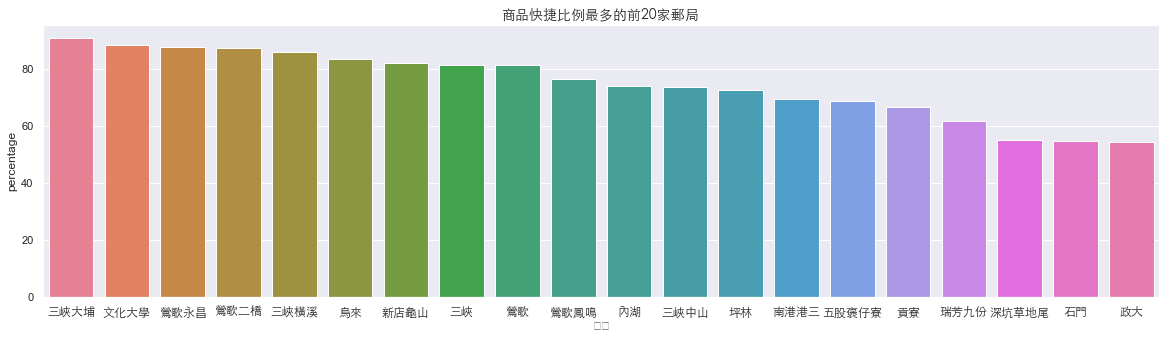

In [110]:
df_temp = df_acc15_pcts3[df_acc15_pcts3['ACC15']==3]
sns.barplot(x='局名', y='percentage', data=df_temp, order=df_temp.sort_values('percentage', ascending=False)[0:20]['局名'], palette='husl')
plt.title('商品快捷比例最多的前20家郵局', fontproperties=font, size=14)
plt.gcf().set_size_inches(20,5)
plt.xticks(fontproperties=font,size=12)
plt.show()

### 新店ACC15

In [14]:
df2 = df[df['局名']=='新店']

In [15]:
# 去除V資料
df2 = df2[df2['ACC15'] != 'V']
df2['ACC15'] = df2['ACC15'].astype('int64')

In [16]:
df2_acc15 = df2.groupby(['局名','ACC14','ACC15']).size().reset_index()
df2_acc15 = df2_acc15.rename(columns={0: 'count'})

In [17]:
df2_acc15

,局名,ACC14,ACC15,count
0,新店,1,1,32507
1,新店,1,2,76064
2,新店,1,3,30
3,新店,1,4,107
4,新店,1,5,4971
5,新店,1,6,73
6,新店,1,7,130
7,新店,2,1,66549
8,新店,3,1,1428
9,新店,3,2,353
